# Historical Years

PyPSA-GB can model the GB power system  by solving a network constrained Linear Optimal Power Flow (LOPF) problem. This notebook shows the example application of a historical 3 day period.

In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
import pypsa
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import pandas as pd
import cartopy.crs as ccrs

import data_reader_writer

## Setting up simulation

Set the required inputs for the LOPF: the start, end and year of simulation, and the timestep.

In [3]:
# write csv files for import
#start = '2016-12-01 00:00:00'
#end = '2016-12-03 23:30:00'
#year = int(start[0:4])
# time step as fraction of hour
#time_step = 0.5

In [4]:
# write csv files for import
#start = '2016-12-01 00:00:00'
#end = '2016-12-30 23:00:00'
#year = int(start[0:4])
# time step as fraction of hour
#time_step = 1

In [5]:
#write csv files for import
start = '2022-01-01 00:00:00'
end = '2022-12-30 23:00:00'
year = int(start[0:4])
# time step as fraction of hour
time_step = 1


# write csv files for import
#start = '2016-12-01 00:00:00'
#end = '2016-12-30 23:00:00'
#year = int(start[0:4])
# time step as fraction of hour
#time_step = 1

data_reader_writer is a script written to read in data from the various sources and write csv files in the format required for populating a PyPSA network object

In [6]:
data_reader_writer.data_writer(start, end, time_step, year, demand_dataset='historical', merge_generators=True)

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value


In [7]:
network = pypsa.Network()

network.import_from_csv_folder('LOPF_data_heat_Hist')

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network LOPF_data_heat_Hist has buses, generators, lines, links, loads, storage_units


In [8]:
for i in range(29):
    network.add(
        "Generator",
        "boiler {}".format(i+1),
       bus='Heat Bus {}'.format(i+1),
       p_nom_extendable=True,
        efficiency=0.80,
        marginal_cost=20.0,
        carrier="heat",
    )

In [9]:
network.buses

,v_nom,carrier,x,y,type,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network
Bus,,,,,,,,,,,
Heat Bus 1,NaN,heat,-4.533299,57.469876,,None,1.0,0.0,inf,PQ,
Heat Bus 2,NaN,heat,-1.804331,57.484481,,None,1.0,0.0,inf,PQ,
Heat Bus 3,NaN,heat,-4.054907,56.724571,,None,1.0,0.0,inf,PQ,
Heat Bus 4,NaN,heat,-3.725282,56.109237,,None,1.0,0.0,inf,PQ,
Heat Bus 5,NaN,heat,-4.414788,55.808831,,None,1.0,0.0,inf,PQ,
...,...,...,...,...,...,...,...,...,...,...,...
Belgium,400.0,AC,3.183780,51.325930,,None,1.0,0.0,inf,PQ,
France1,400.0,AC,1.784430,50.903010,,None,1.0,0.0,inf,PQ,
France2,400.0,AC,-0.262170,49.110790,,None,1.0,0.0,inf,PQ,


To approximate n-1 security and allow room for reactive power flows, don't allow any line to be loaded above 70% of their thermal rating

In [10]:
contingency_factor = 0.7
network.lines.s_max_pu[0:99] *= contingency_factor

In [11]:
network.consistency_check()

In [12]:
network.storage_units

,p_nom,carrier,marginal_cost,max_hours,efficiency_store,efficiency_dispatch,state_of_charge_initial,bus,standing_loss,capital_cost,...,q_set,sign,build_year,lifetime,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
Dinorwig,1728.0,Pumped Storage Hydroelectric,0.0,5.266,0.865,0.865,9099.648,Deeside,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.0
Ffestiniog,360.0,Pumped Storage Hydroelectric,0.0,3.889,0.850,0.850,1400.040,Deeside,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.0
Cruachan,440.0,Pumped Storage Hydroelectric,0.0,16.136,0.865,0.865,7099.840,Errochty,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.0
Foyers,300.0,Pumped Storage Hydroelectric,0.0,21.000,0.865,0.865,6300.000,Beauly,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.0
STES_Beauly,500.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.950,1440000.000,Heat Bus 1,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.0
STES_Peterhead,500.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.950,1440000.000,Heat Bus 2,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.0
STES_Errochty,500.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.950,1440000.000,Heat Bus 3,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.0
STES_Denny/BonnyBdige,501.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.950,1440000.000,Heat Bus 4,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.0
STES_Neilston,502.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.950,1440000.000,Heat Bus 5,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.0


## Running the optimisation

In [13]:
network.lopf(network.snapshots, solver_name="gurobi", pyomo=False)

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 185.82s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-29
Read LP format model from file C:\Users\salene\AppData\Local\Temp\pypsa-problem-sjnhromt.lp
Reading time = 120.11 seconds
obj: 29589908 rows, 8050499 columns, 52863823 nonzeros
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 29589908 rows, 8050499 columns and 52863823 nonzeros
Model fingerprint: 0xc839b7ff
Coefficient statistics:
  Matrix range     [6e-05, 3e+03]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+07, 1e+07]
  RHS range        [4e-06, 1e+06]
Presolve removed 27268524 rows and 52590 columns (presolve time = 8s) ...
Presolve removed 27268524 rows and 239099 columns (presolve time = 11s) ...
Presolve removed 27268524 rows and 239099 columns (presolve time = 15s) ...
Presolve

  86   1.03580417e+11  1.03534992e+11  2.17e-01 1.71e-13  8.89e+00   386s
  87   1.03578058e+11  1.03535305e+11  2.06e-01 1.71e-13  8.36e+00   389s
  88   1.03576877e+11  1.03536017e+11  2.00e-01 1.71e-13  7.99e+00   393s
  89   1.03574427e+11  1.03536764e+11  1.88e-01 1.71e-13  7.37e+00   397s
  90   1.03573326e+11  1.03537345e+11  1.82e-01 1.71e-13  7.04e+00   402s
  91   1.03571609e+11  1.03537643e+11  1.73e-01 1.71e-13  6.64e+00   406s
  92   1.03570405e+11  1.03537875e+11  1.67e-01 1.71e-13  6.36e+00   410s
  93   1.03568275e+11  1.03538139e+11  1.55e-01 1.14e-13  5.89e+00   414s
  94   1.03567034e+11  1.03538705e+11  1.48e-01 1.71e-13  5.54e+00   418s
  95   1.03565472e+11  1.03538915e+11  1.40e-01 1.71e-13  5.19e+00   422s
  96   1.03564013e+11  1.03539116e+11  1.32e-01 1.14e-13  4.87e+00   426s
  97   1.03563565e+11  1.03539470e+11  1.29e-01 1.71e-13  4.71e+00   430s
  98   1.03562193e+11  1.03539585e+11  1.22e-01 1.71e-13  4.42e+00   434s
  99   1.03561294e+11  1.03539884e+11 

INFO:pypsa.linopf:Optimization successful. Objective value: 1.04e+11


('ok', 'optimal')

## Power output by generation type

Group the generators by the carrier, and print their summed power outputs over the simulation period.

In [14]:
p_by_carrier = network.generators_t.p.groupby(
    network.generators.carrier, axis=1).sum()

storage_by_carrier = network.storage_units_t.p.groupby(
    network.storage_units.carrier, axis=1).sum()

# to show on graph set the negative storage values to zero
storage_by_carrier[storage_by_carrier < 0] = 0

p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

# interconnector exports
exports = network.loads_t.p
# multiply by negative one to convert it as a generator
# i.e. export is a positive load, but negative generator
exports['Interconnectors Export'] = exports.iloc[:, -6:].sum(axis=1) * -1
interconnector_export = exports[['Interconnectors Export']]

# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'] +
    p_by_carrier['Landfill Gas'] + p_by_carrier['Anaerobic Digestion'] +
    p_by_carrier['Sewage Sludge Digestion'])

# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(
    columns={'Interconnector': 'Interconnectors Import'})

p_by_carrier

carrier,Anaerobic Digestion,Biomass (co-firing),Biomass (dedicated),Coal,EfW Incineration,Interconnectors Import,Landfill Gas,Hydro,Natural Gas,Nuclear,...,Sewage Sludge Digestion,Shoreline Wave,Small Hydro,Solar Photovoltaics,Wind Offshore,Wind Onshore,heat,Pumped Storage Hydroelectric,Seasonal Thermal Energy Storage,Biomass
snapshot,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,244.2,0.00,0.00,0.000000,356.436,2882.499889,743.5,607.009206,24574.634978,6510.14,...,44.4,23.0,71.601962,0.0,3350.163489,4240.760135,13131.693045,0.000000,25947.171723,1032.10
2016-01-01 01:00:00,244.2,0.00,0.00,0.000000,356.436,2722.000051,743.5,575.291439,24066.699730,6510.14,...,44.4,24.0,67.208562,0.0,2777.624449,3892.858437,10448.461576,0.000000,25785.925188,1032.10
2016-01-01 02:00:00,244.2,0.00,0.00,0.000000,356.436,2719.500032,743.5,574.843740,25531.576690,6510.14,...,44.4,24.0,67.156261,0.0,1814.238046,3387.402432,10769.237339,0.000000,25901.702630,1032.10
2016-01-01 03:00:00,244.2,0.00,0.00,0.000000,356.436,2641.499956,743.5,683.634260,27014.982756,6510.14,...,44.4,24.0,79.865738,0.0,860.112342,2721.478336,13610.162594,7.801635,25992.477999,1032.10
2016-01-01 04:00:00,244.2,0.00,0.00,3815.881566,356.436,2630.000016,743.5,847.939287,28682.300000,6510.14,...,44.4,24.0,99.060715,0.0,525.235358,2367.560762,40255.420896,37.931374,26011.517838,1032.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,244.2,509.54,1007.40,14513.000000,356.436,1862.500033,743.5,632.238739,28761.065391,6510.14,...,44.4,23.0,67.450017,0.0,2197.461750,5408.172069,466676.559851,0.000000,0.000000,2549.04
2016-12-30 20:00:00,244.2,509.54,1026.38,14513.000000,356.436,1009.500030,743.5,575.361723,28730.199412,6510.14,...,44.4,23.0,60.522377,0.0,2263.032764,5397.570857,617910.473177,0.000000,0.000000,2568.02
2016-12-30 21:00:00,244.2,509.54,1007.40,14513.000000,356.436,1063.500048,743.5,841.981702,28718.258671,6510.14,...,44.4,23.0,59.262807,0.0,2311.246482,5371.752929,522042.497508,0.000000,0.000000,2549.04


Graph the power output of the different generation types...

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\plotting\_matplotlib\core.py:1391: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


Text(0.5, 0, '')

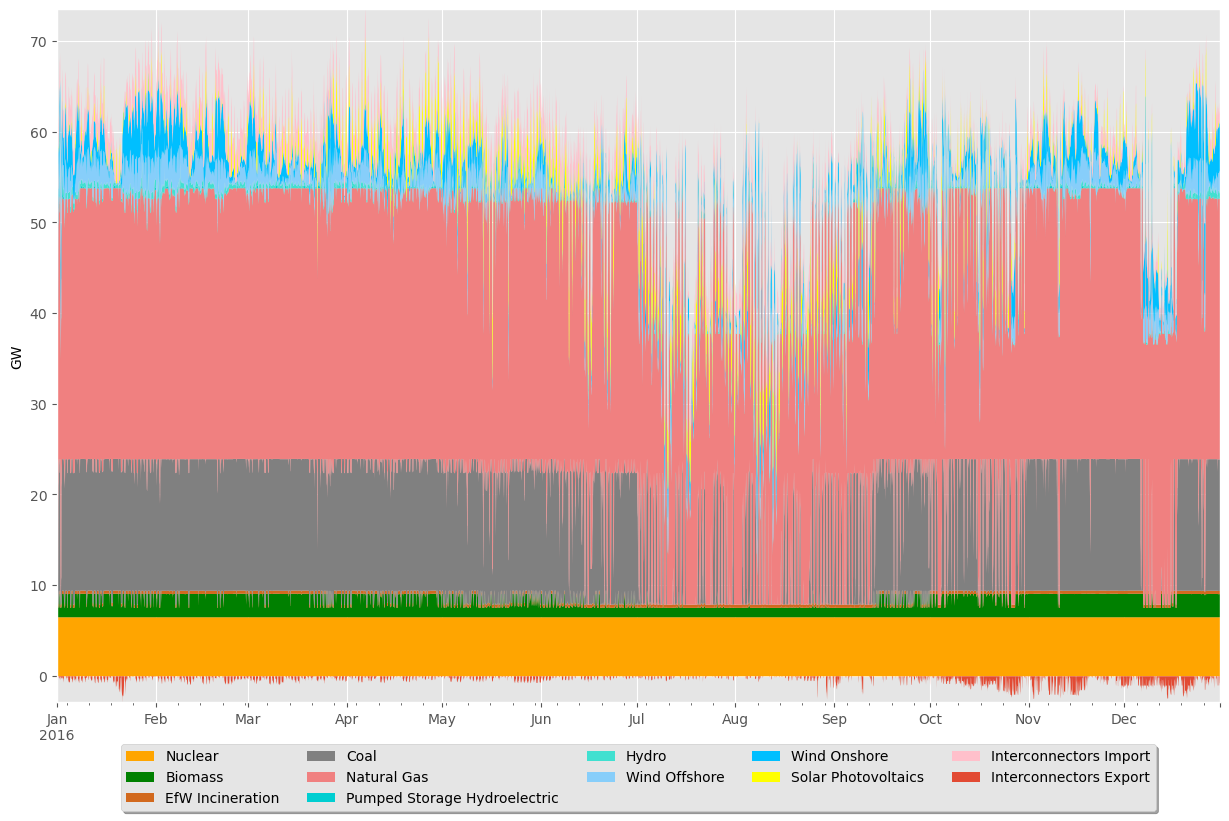

In [15]:
cols = ["Nuclear", 'Shoreline Wave', 'Biomass',
        'EfW Incineration',
        "Coal", "Oil", "Natural Gas",
        "Pumped Storage Hydroelectric", 'Hydro',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        'Interconnectors Import'
        ]

p_by_carrier = p_by_carrier[cols]

p_by_carrier.drop(
    (p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    axis=1, inplace=True)


colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Anaerobic Digestion': 'green',
          'EfW Incineration': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'Interconnectors Import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
(interconnector_export / 1e3).plot.area(ax=ax, stacked=True, linewidth=0.)
# rescale the y axis
ax.set_ylim([(interconnector_export / 1e3).sum(axis=1).min(), (p_by_carrier / 1e3).sum(axis=1).max()])

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.set_ylabel("GW")

ax.set_xlabel("")

## Plotting storage

Graph the pumped hydro dispatch and state of charge...

Text(0.5, 0, '')

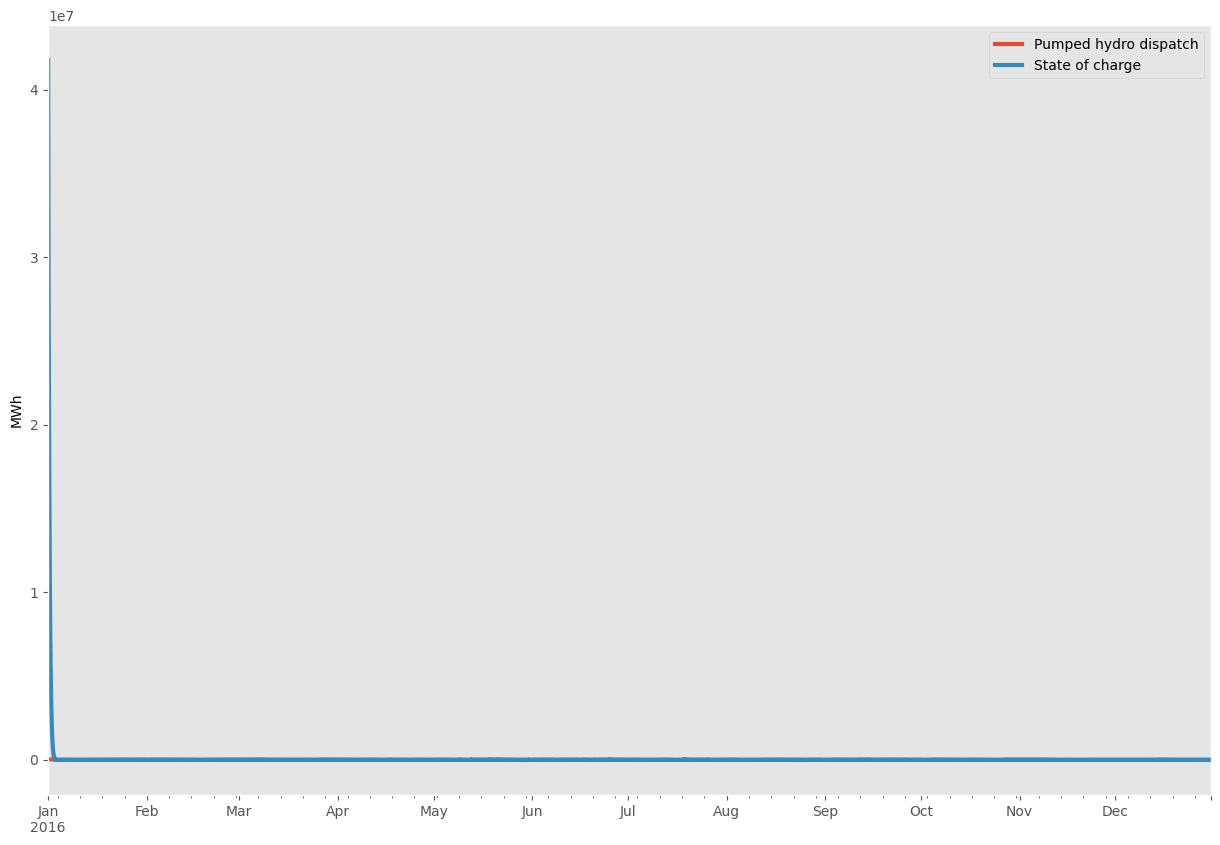

In [16]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage = network.storage_units_t.p.sum(axis=1)
state_of_charge = network.storage_units_t.state_of_charge.sum(axis=1)
p_storage.plot(label="Pumped hydro dispatch", ax=ax, linewidth=3)
state_of_charge.plot(label="State of charge", ax=ax, linewidth=3)

ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

## Plotting line loading

Look at the line loading stats and graph...

In [17]:
now = network.snapshots[139]

print("With the linear load flow, there is the following per unit loading:")
loading = network.lines_t.p0.loc[now] / network.lines.s_nom
loading.describe()

With the linear load flow, there is the following per unit loading:


count    105.000000
mean       0.043223
std        0.313125
min       -0.724167
25%       -0.114300
50%        0.046882
75%        0.255302
max        0.700000
dtype: float64

(<matplotlib.collections.PatchCollection at 0x19a4b935dc0>,
 <matplotlib.collections.LineCollection at 0x19a035ad850>)

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


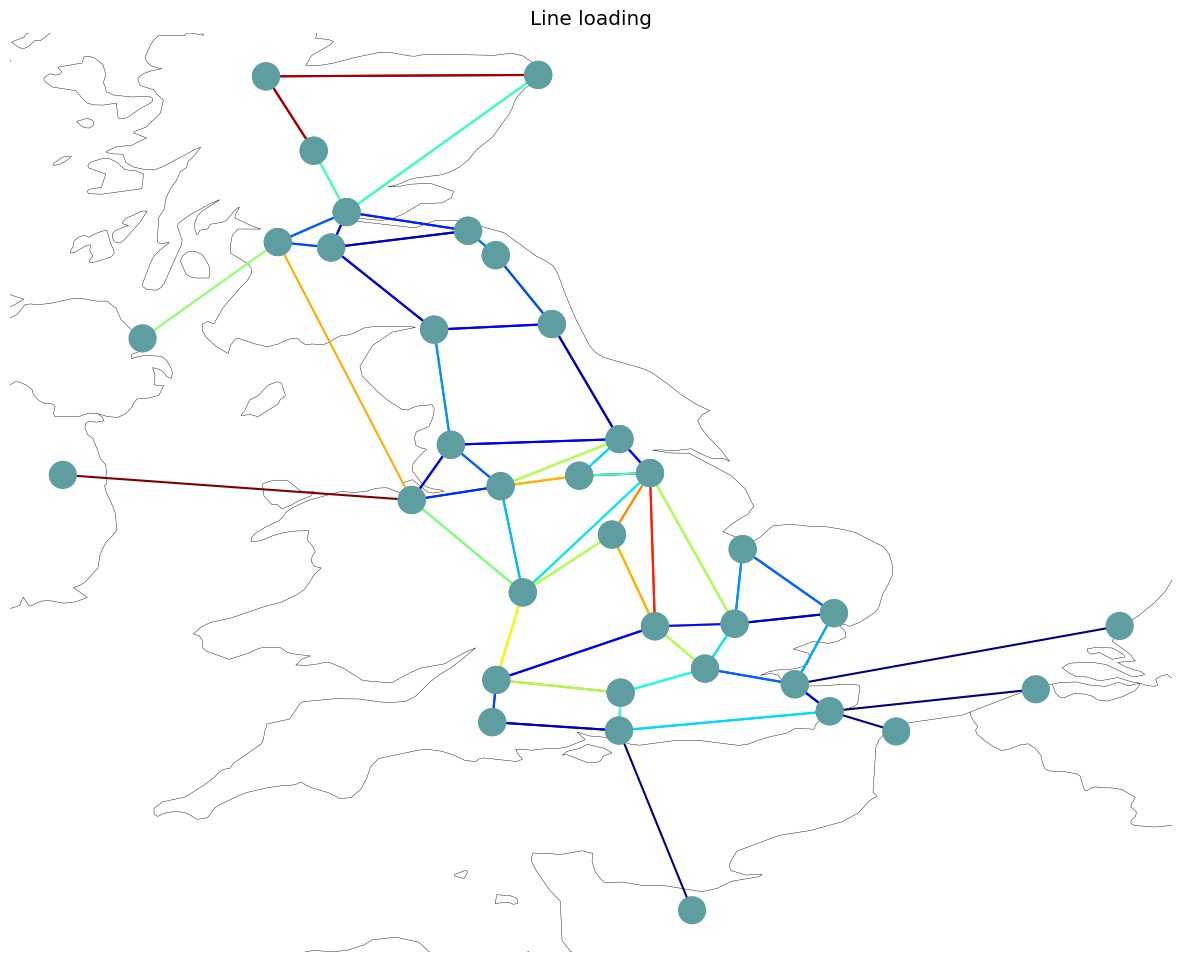

In [18]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(15, 17)

network.plot(ax=ax, line_colors=abs(loading), line_cmap=plt.cm.jet, title="Line loading")

## Plotting locational marginal prices

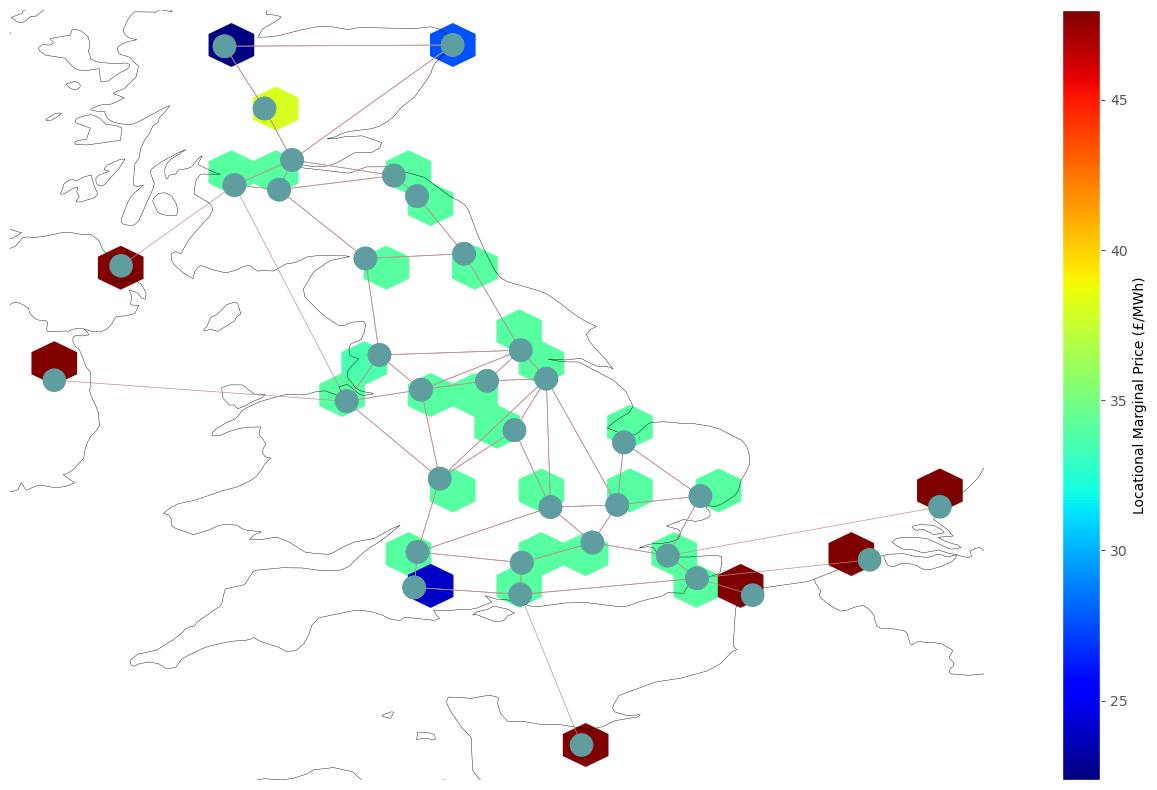

In [19]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(20, 10)

network.plot(ax=ax, line_widths=pd.Series(0.5, network.lines.index))
plt.hexbin(network.buses.x, network.buses.y,
           gridsize=20,
           C=network.buses_t.marginal_price.loc[now],
           cmap=plt.cm.jet)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar

cb = plt.colorbar()
cb.set_label('Locational Marginal Price (£/MWh)')

## Plotting curtailment

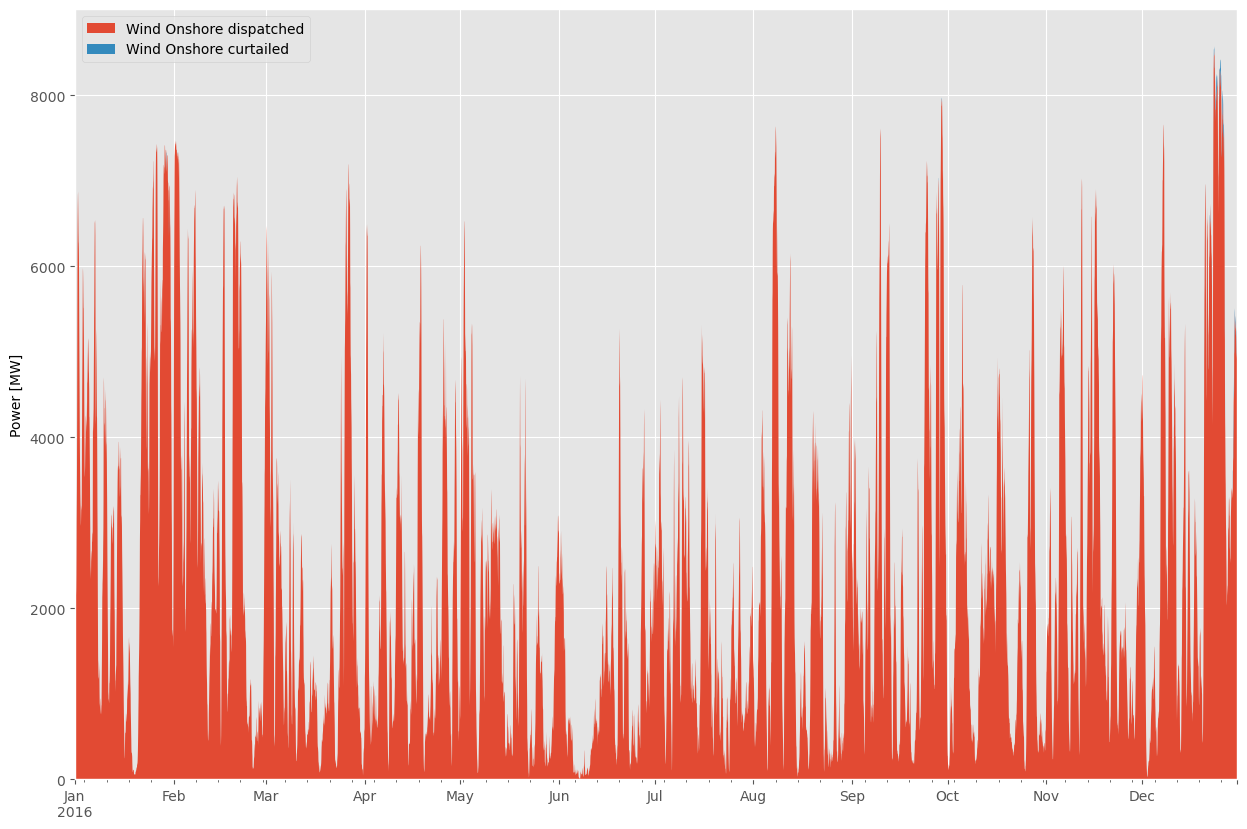

In [20]:
carrier = "Wind Onshore"

capacity = network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
p_available = network.generators_t.p_max_pu.multiply(network.generators["p_nom"])
p_available_by_carrier = p_available.groupby(network.generators.carrier, axis=1).sum()
p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier
p_df = pd.DataFrame({carrier + " available": p_available_by_carrier[carrier],
                     carrier + " dispatched": p_by_carrier[carrier],
                     carrier + " curtailed": p_curtailed_by_carrier[carrier]})

p_df[carrier + " capacity"] = capacity
p_df["Wind Onshore curtailed"][p_df["Wind Onshore curtailed"] < 0.] = 0.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_df[[carrier + " dispatched", carrier + " curtailed"]].plot(kind="area", ax=ax, linewidth=0)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()